<a href="https://colab.research.google.com/github/Pranav8838/intern-task/blob/main/intern_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================
# Loan Default Risk Analysis
# =============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Load Dataset (after uploading loan_data.csv)
df = pd.read_csv("loan_data.csv")

print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (10, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [ ]:
# Missing values check
print("Missing Values:\n", df.isnull().sum())

# Fill missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier removal for LoanAmount
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount'] > (Q3 + 1.5 * IQR)))]


Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-522074468.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-522074468.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Loan to Income Ratio
df['Loan_to_Income'] = df['LoanAmount'] / (df['ApplicantIncome']+1)

# Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']



In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_to_Income','TotalIncome']] = scaler.fit_transform(
    df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_to_Income','TotalIncome']]
)

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_Income,TotalIncome
0,LP001002,1,0,0,0,0,1.433589,-1.202487,0.577495,360,1,2,1,-0.913674,0.716614
1,LP001003,1,1,1,0,0,0.490894,0.338822,0.007911,360,1,0,0,-0.642022,0.948228
2,LP001005,1,1,0,0,1,-0.687847,-1.202487,-1.953989,360,1,2,1,-1.185204,-2.010109
3,LP001006,1,1,0,1,0,-0.998356,1.207598,-0.245238,360,1,2,1,1.053909,-0.152415
4,LP001008,1,0,0,0,0,1.546028,-1.202487,0.419277,360,1,2,1,-1.047505,0.861134


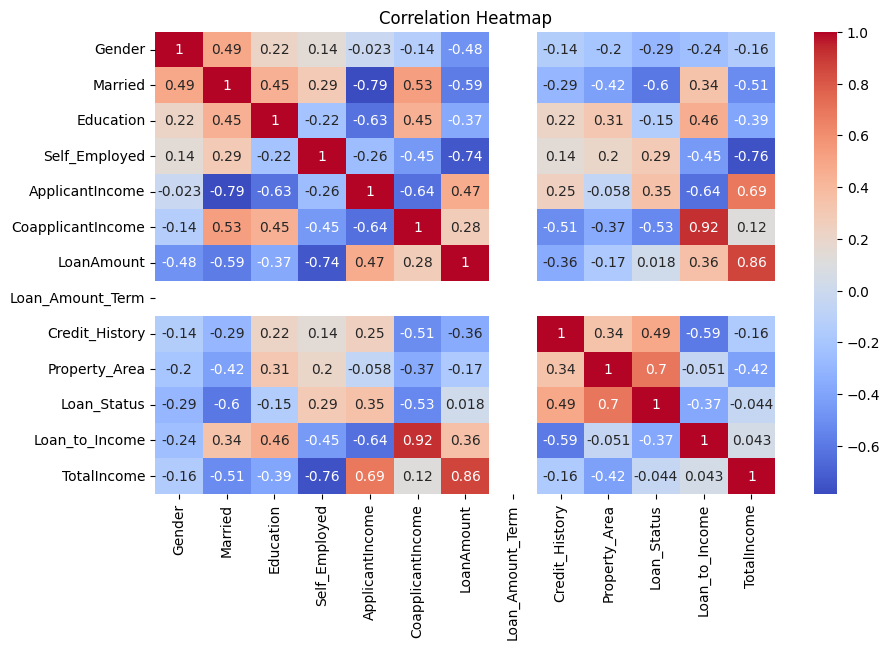

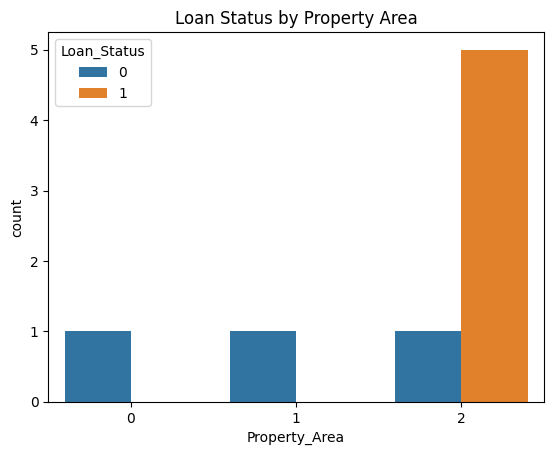

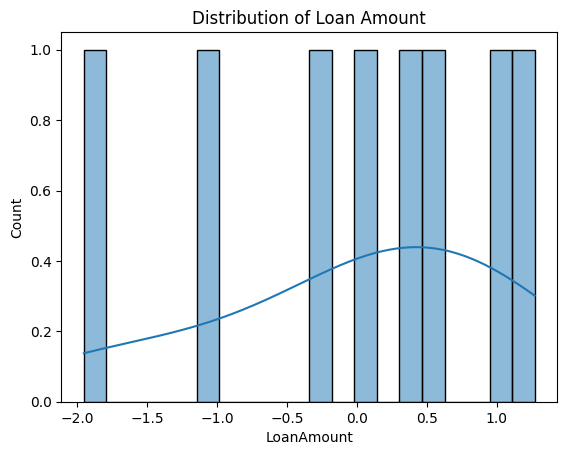

In [ ]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Loan Status vs Property Area (categorical)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Loan Status by Property Area")
plt.show()

# Distribution of Loan Amount
sns.histplot(df['LoanAmount'], bins=20, kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

